### <span style="color:red">Lorenzo Albano, 967738</span>

# <span style="color:red"> ESERCIZI 8.1 e 8.2:</span> Montecarlo: metodo variazionale e Simulated Annealing (Ground state particella in un potenziale)

L'esercitazione si pone come obiettivo trovare il ground state di una particella in spazio 1D con potenziale
$$
V(x) = x^4 - \frac{5}{2}x^2
$$
attraverso un metodo Montecarlo variazionale.

A tal proposito si ricorda il principio variazionale di Ritz $\Rightarrow$ 
il valore di aspettazione di una Hamiltoniana in uno stato generico $\Psi_T$ ha l'energia del ground state $E_0$ come limite inferiore:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

Dato che il modello 1D con potenziale $V(x)$ proposto non è risolvibile analiticamente, occorre partire da una funzione d'onda di prova per trovare tramite metodi variazionali Montecarlo la migliore approssimazione della funzione d'onda del ground state ($\Psi_0$).

Un possibile punto di partenza è la funzione d'onda di prova seguente:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$
che dipende da due parametri variazionali $\sigma$ e $\mu$ (rispettivamente devazione standard e valor medio delle due Gaussiane).

Nota: Non occorre conoscere la normalizzazione perché l'algoritmo di Metropolis lavora con il rapporto tra le probabilità.

#### Metropolis per aggiornare la posizione

Al fine di campionare un'approssimazione del modulo quadro di $\Psi_0$, si è scritto quindi l'algoritmo di Metropolis usando una probabilità di transizione uniforme: $T(x_{new}|x_{old})$. Il programma cerca di minimizzare il valore di aspettazione dell'Hamiltoniana:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} = \int dx \frac{|\Psi^{\sigma,\mu}_T(x)|^2}{\int dx |\Psi^{\sigma,\mu}_T(x)|^2}\bigg[\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)} + x^4-\frac{5}{2}x^2\bigg]
$$

dove il termine fuori dalla parentesi quadra corrisponde al peso probabilistico, mentre la parentesi deriva direttamente dalla definizione del potenziale: $\hat{H}=-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}+V(x)$

Per semplicità si fa uso di unità naturali: $\hbar = 1$ and $m=1$.

#### Simulated annealing per aggiornare i parametri $\sigma$ e $\mu$

Per trovare i parametri che minimizzino $\langle {\hat H} \rangle_T$, si sfrutta l'algoritmo di Simulated annealing (SA) (introducendo quindi una _temperatura fittizia_).
Questo esplora lo spazio delle configurazioni di $\sigma$ e $\mu$ in modo casuale, dapprima accettando anche soluzioni non ottimali alla minimizzazione di $\langle {\hat H} \rangle_T$ (alta _temperatura_), per poi muoversi verso la configurazione migliore (minore energia!) all'abbassarsi della _temperatura_. Questo processo graduale di diminuzione della _temperatura_ è funzionale ad evitare che l'algoritmo si "incastri" in un minimo locale (equilibrio metastabile).

#### Grafici

Si presentano dunque i seguenti grafici:

- Valore di $\langle {\hat H} \rangle_T$ in funzione dei passi dell'algoritmo di SA
- Valori di $\mu$ e $\sigma$ in funzione dei passi dell'algoritmo di SA
- Valore di $\langle {\hat H} \rangle_T \hspace{0.2cm}MINIMA$ in funzione del numero di blocchi (o step totali) della simulazione Montacarlo 
- Campionamento di $|\Psi_T(x)|^2 \hspace{0.2cm} MINIMA$ da confrontare con 
1. Soluzione numerica ottenuta trasformando l'equazione di Schrodinger in una equazione matriciale (metodo già NON più efficiente per un numero di particelle maggiore di 10)
2. Soluzione "analitica" ottenuta ponendo i valori minimi di $\mu$ e $\sigma$ trovati nel secondo grafico direttamente in $\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}$ (che va NORMALIZZATA!)

## <span style="color:blue"> GRAFICO A) </span> $\langle {\hat H} \rangle_T$ in funzione dei passi dell'algoritmo di SA

Per corretta visualizzazione delle barre di errore (in rosso) si consiglia di usare lo zoom del grafico interattivo

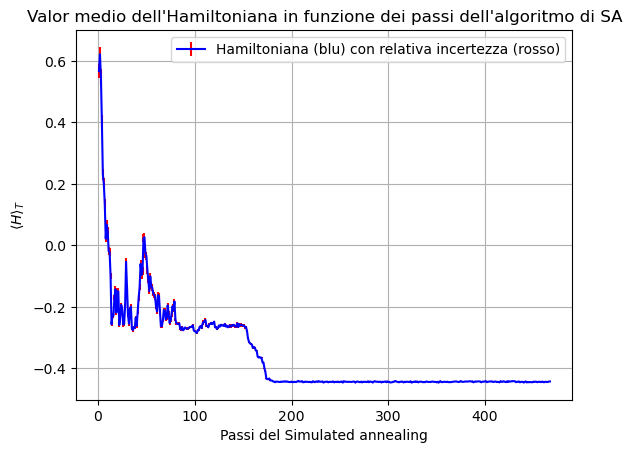

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Carico i dati dal file
data = np.loadtxt("2.Hamiltoniana(passi).out")

# Seleziono le colonne che mi interessano (La prima sono le temperature)
x = data[:,1] # Seconda colonna (SAstep)
y = data[:,2] # Terza colonna (<H>)
errors = data[:,3] #Quarta colonna (errore)

# Disegna il grafico
plt.errorbar(x, y, yerr=errors, fmt='-', color='blue', ecolor='red', label="Hamiltoniana (blu) con relativa incertezza (rosso)")
plt.xlabel("Passi del Simulated annealing")
plt.ylabel(r"$\langle H \rangle_T$")
plt.title("Valor medio dell'Hamiltoniana in funzione dei passi dell'algoritmo di SA")
plt.grid(True)
plt.legend()
plt.show()

## <span style="color:green"> GRAFICO B) </span> $\mu$ e $\sigma$ in funzione dei passi dell'algoritmo di SA

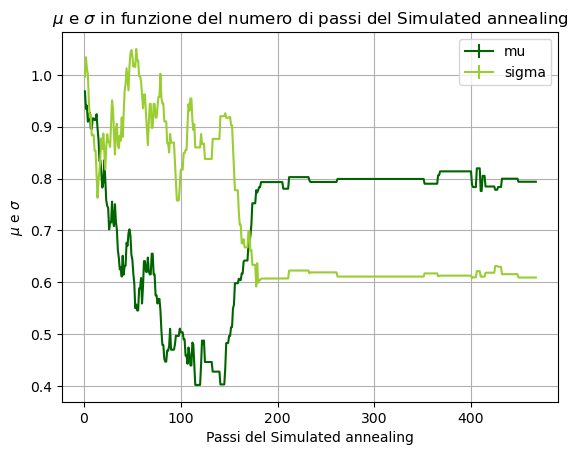

In [3]:
# Carico i dati dal file
data1 = np.loadtxt("2.Parametri(passi).out")

# Seleziono le colonne che mi interessano (La prima sono le temperature)
x = data1[:,1] # Seconda colonna (SAstep)
mu = data1[:,2] # Terza colonna (<H>)
sigma = data1[:,3] #Quarta colonna (errore)

# Disegna il grafico
plt.errorbar(x, mu, yerr=0, fmt='-', color='darkgreen', label="mu")
plt.errorbar(x, sigma, yerr=0, fmt='-', color='yellowgreen', label="sigma")
plt.xlabel("Passi del Simulated annealing")
plt.ylabel(r"$\mu$ e $\sigma$")
plt.title(r'$\mu$ e $\sigma$ in funzione del numero di passi del Simulated annealing')

plt.grid(True)
plt.legend()
plt.show()



Ultime coordinate, punto in giallo (migliori parametri):
mu =  0.793966
sigma =  0.609342


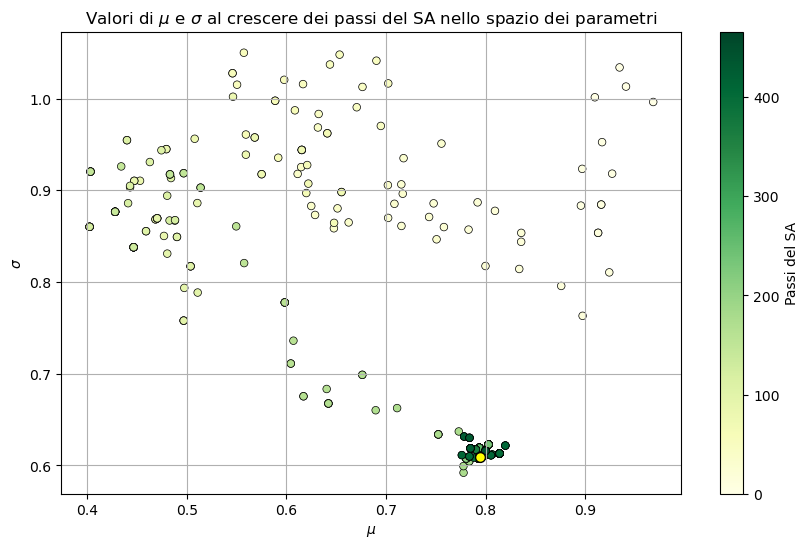

In [4]:
# Sequenza di colori
colors = np.arange(len(x))

# Imposta le dimensioni della figura
plt.figure(figsize=(10, 6))  # Imposta le dimensioni a tuo piacimento
# Creazione dello scatter plot con punti colorati (dimensione 30)
plt.scatter(mu, sigma, c=colors, cmap='YlGn', s=30, edgecolors='black', linewidths=0.5)

# Aggiunta di una barra dei colori
plt.colorbar().set_label('Passi del SA')

# Colora l'ultimo punto di giallo (dimensione 50)
last_point = len(x) - 1
plt.scatter(mu[last_point], sigma[last_point], c='yellow', s=50, edgecolors='black', linewidths=1)

# Stampa le coordinate dell'ultimo punto
best_mu = mu[last_point]
best_sigma = sigma[last_point]
print("Ultime coordinate, punto in giallo (migliori parametri):")
print("mu = ", best_mu)
print("sigma = ", best_sigma)

# Disegna il grafico
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\sigma$")
plt.title(r'Valori di $\mu$ e $\sigma$ al crescere dei passi del SA nello spazio dei parametri')
plt.grid(True)
plt.show()

## <span style="color:purple"> GRAFICO C) </span> Minimo dell'energia in funzione del numero di blocchi MC

Si riporta che nella simulazione sono stati usati $N=100$ blocchi da $M=10000$ passi ciascuno

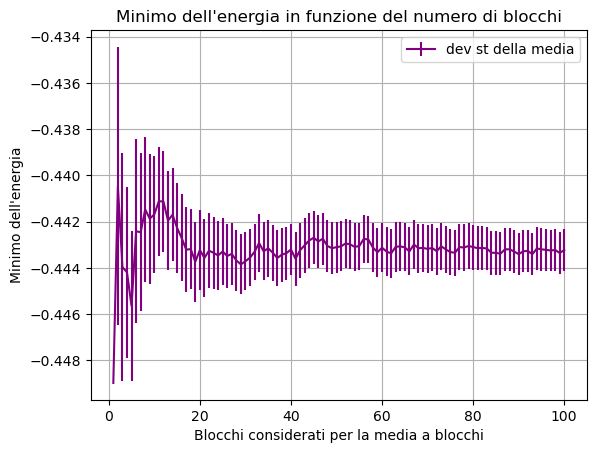

In [5]:
data3 = np.loadtxt('2.Energie_finali_Hamiltoniana(numero_blocchi).out')
blocchi_considerati = data3[:, 0]
energy_min = data3[:, 2]
energy_min_err = data3[:,3]

# Plot for Potential Energy
plt.errorbar(blocchi_considerati, energy_min, yerr=energy_min_err, color = 'purple', label = 'dev st della media')
plt.xlabel('Blocchi considerati per la media a blocchi')
plt.ylabel("Minimo dell'energia")
plt.title("Minimo dell'energia in funzione del numero di blocchi")
plt.grid(True)
plt.legend()
plt.show()

## <span style="color:orange"> GRAFICO D) </span>$|\Psi_T(x)|^2 \hspace{0.2cm} MINIMA$ confrontata con risultato numerico ed analitico

Energia del ground state numerica:  -0.4608785042700637


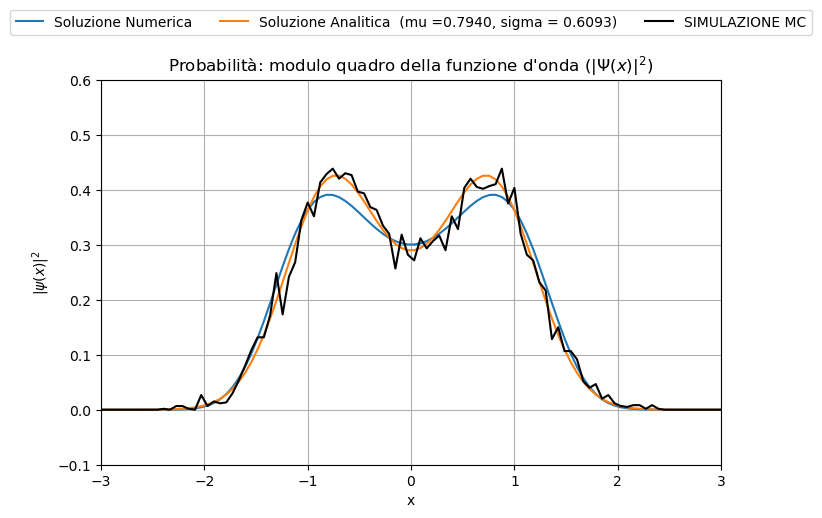

In [15]:
import numpy as np
import matplotlib.pyplot as plt

#Funzione "analitica"
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2
    
def Psi2(x):
    return (np.exp(-(x-best_mu)**2/(2.0 * best_sigma**2)) + np.exp(-(x+best_mu)**2/(2.0 * best_sigma**2)))**2

hbar = 1
m = 1
a = 6
N = 100 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

#normalize Analytical
psi2min = Psi2(x)
psi2min = psi2min / (a*np.mean(psi2min))


print("Energia del ground state numerica: ", E[0])

#Istogramma da file
data = np.loadtxt('2.Istogramma_funz_onda_quadra.out')
psi2MC = data[:, 1]

# Plot a few things
plt.figure(figsize=(8,5))
plt.plot(x, (psi[0]**2), label = 'Soluzione Numerica')
plt.plot(x, psi2min, label = 'Soluzione Analitica  (mu =' + "{:.4f}".format(best_mu) +', sigma = ' +"{:.4f}".format(best_sigma)+')')
plt.plot(x, psi2MC, color='black', label = 'SIMULAZIONE MC')
plt.title(r"Probabilità: modulo quadro della funzione d'onda ($|\Psi(x)|^2$)")
plt.xlabel("x")
plt.ylabel(r"$|ψ(x)|^2$")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.1, 0.6))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3)
plt.show()